# Final Report

# Examining the Productivity of Employees in the Garment Industry Based on Various Factors 

<B> Authors </B> (Group 14): Sophia Liu, Tejasvi Kathuria, Youjung Kim, Zhekai Zhu

----------

## Introduction

In labor-intensive industries, effective employment is often a topic of discussion, as the production of goods is highly dependent on the productivity of individual workers. Particularly, a common issue in these industries is that the actual productivity of employees does not meet the target productivity, and thus can result in substantial loss in profitability (Imran et al.). In this research, the garment industry was selected to find the relationship between productivity and employees. With the selected data, we propose an inferential question: How do various external factors relate to the productivity of employees in the garment industry? 

To answer these questions, we want to first consider the variables presented in the data set. The research identified fifteen variables: 
|Variables| Description | 
|:--:|:--:| 
|Date||
|Day||
|Quarter| One of four quarters in a month|
|Department| Associated department of the employee|
|Team_no| Associated team number of the employee|
|No_of_workers| Number of workers in the team for which the employee belongs to|
|No_of_style_change| Number of style changes in the style of a particular product|
|Targeted_productivity| Targeted productivity set by the Authority for each team for each day|
|Smv| Standard Minute Value, it is the allocated time for a task|
|Wip| Work in progress. Includes the number of unfinished items for products|
|Over_time| Represents the amount of overtime by each team in minutes|
|Incentive| Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action|
|Idle_time| The amount of time when the production was interrupted due to several reason|
|Idle_men| The number of workers who were idle due to production interruption|
|Actual_productivity| The actual % of productivity that was delivered by the workers. It ranges from 0-1|


Notably, we want to select `actual_productivity` as the response variable, and all other variables as potential explanatory variables. For explanatory variables, we will use R to perform further analysis to evaluate how much they influence the response variable.

## Methods and Results

>### Load library

In [1]:
#load library
library(tidyverse)
library(infer)
library(broom)
library(cowplot)
library(latex2exp)
library(repr)
library(digest)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(GGally)
options(jupyter.plot_mimetypes = c("text/plain", "image/png"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:faraway’:

    happy




>### Load data

In [2]:
#Loading data from the Internet
productivity_df_raw <- read.csv(file = 'https://raw.github.com/JacksonZhuGithub/STAT301_group_project/main/garments_worker_productivity.csv')

#Overview of the dataframe
print("figure 1: The overview of the data:")
head(productivity_df_raw,3)

#number of observations
nrow<-nrow(productivity_df_raw)
print(c("The number of rows:",nrow))

[1] "figure 1: The overview of the data:"


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0,0,0,59.0,0.9407254
2,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NA,960,0,0,0,0,8.0,0.8865000
3,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705


[1] "The number of rows:" "1197"               


We first download the data from the internet, and show that there are 1197 rows, which indicates that there are 1197 observations in our sample.

>### Clean and wrangle data

We are interested in the category variable `department`, so we are seeing how many levels it has and how many rows for each category.

In [3]:
#check levels of department
print("The levels of category variable department")
levels(as.factor(productivity_df_raw$department))

#check the number of each
print(c("The number of finishing:",nrow(productivity_df_raw%>%filter(department=="finishing"))))
print(c("The number of finishing :",nrow(productivity_df_raw%>%filter(department=="finishing "))))
print(c("The number of sweing:",nrow(productivity_df_raw%>%filter(department=="sweing"))))

print(c("The total 249+257+691=",249+257+691))

[1] "The levels of category variable department"


[1] "finishing"  "finishing " "sweing"

[1] "The number of finishing:" "249"                     
[1] "The number of finishing :" "257"                      
[1] "The number of sweing:" "691"                  
[1] "The total 249+257+691=" "1197"                  


We can see that there are 3 levels, but the two categories "finishing " and "finishing" are wield, and there is no expaination in the source. We need to check what the differences are.

In [4]:
#pick some observation with "finishing"
print("figure 2: observation with 'finishing'")
productivity_df_raw%>%filter(department=="finishing")%>%head(,n=3)

#pick some observation with "finishing " (with a space)
print("figure 3: observation with 'finishing '")
productivity_df_raw%>%filter(department=="finishing ")%>%head(,n=3)

[1] "figure 2: observation with 'finishing'"


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,finishing,Thursday,11,0.7,4.15,NA,1440,0,0,0,0,12,0.4363264
2,2/4/2015,Quarter1,finishing,Wednesday,2,0.8,3.94,NA,2160,0,0,0,0,18,0.9667593
3,2/4/2015,Quarter1,finishing,Wednesday,1,0.8,3.94,NA,1200,0,0,0,0,10,0.9291833


[1] "figure 3: observation with 'finishing '"


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NA,960,0,0,0,0,8,0.8865000
2,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NA,960,0,0,0,0,8,0.7551667
3,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NA,960,0,0,0,0,8,0.7059167


After checking the data, we believe that there is a typo between "finishing" and "finishing ". Thus, we decide to replace "finishing " with "finishing".

In [5]:
#make "department " to "department"
productivity_df_raw_no_typo<-productivity_df_raw%>%
     filter(department!="sweing")%>%
     mutate(department="finishing")

#combine "sweing" and "finishing"
productivity_df_rbind<-rbind(productivity_df_raw_no_typo,
                            productivity_df_raw%>%filter(department=="sweing"))

#check the levels
print("The levels of category variable department (no typo):")
levels(as.factor(productivity_df_rbind$department))

#check the number of rows after combination
print(c("The number of rows of finishing",nrow(productivity_df_rbind)))

[1] "The levels of category variable department (no typo):"


[1] "finishing" "sweing"

[1] "The number of rows of finishing" "1197"                           


Now, the category variable only contains 2 levels: "sweing" and "finishing", and the number of observations is 1197, which is consistent with the number of observations in raw data. This means we did not lose any observations in the above process.

Then, we see that for those observations with department labeled with "finishing", the `wip` shows NA. In our case, we need to fill out the empty box with "0", since the it indicates the number of unfinished items for products. "NA" is not appropriate here.

In [6]:
#filter the rows with department=="finishing"
productivity_df_finishing_NA<-productivity_df_rbind%>%
                filter(department=="finishing")

print("figure 4: The overview of rows with finishing(NA)")
head(productivity_df_finishing_NA,3)


#fill out the NA in `wip` with "0"
productivity_df_finishing_0<-productivity_df_finishing_NA%>%
                      mutate(wip=0)

print("figure 5: The overview of rows with finishing(0)")
head(productivity_df_finishing_0,3)

#the number of finishing observations
print(c("The number of finishing observations:",nrow(productivity_df_finishing_0)))

[1] "figure 4: The overview of rows with finishing(NA)"


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NA,960,0,0,0,0,8,0.8865000
2,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NA,960,0,0,0,0,8,0.7551667
3,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NA,960,0,0,0,0,8,0.7059167


[1] "figure 5: The overview of rows with finishing(0)"


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0,0,0,8,0.8865000
2,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,0,960,0,0,0,0,8,0.7551667
3,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,0,960,0,0,0,0,8,0.7059167


[1] "The number of finishing observations:"
[2] "506"                                  


Now, all `wip` (Work in progress) for those 506 (249"finishing"+257"finishing ") observations with "finishing" labels are replaced by "0", which are more reasonable for our case, instead of directly omitting these rows. Then, we need to combine the "finishing" data to the main data.

In [7]:
#clean data
productivity_df<-rbind(productivity_df_finishing_0,
                      productivity_df_raw%>%filter(department=="sweing"))

#check the levels
print("The levels of department:")
levels(as.factor(productivity_df$department))

#The number of observation
print(c("The number of observation:",nrow(productivity_df)))

[1] "The levels of department:"


[1] "finishing" "sweing"

[1] "The number of observation:" "1197"                      


Now, we obtain the data without typo and reasonable values for `wip`. Then, we try to omit real missing observations.

In [8]:
#omiting rows with empty values
productivity_df<-productivity_df%>%
      na.omit()%>%
      as.data.frame()

#Overview of the dataframe
print("figure 6: The overview of the data")
head(productivity_df,3)

#number of observations
nrow_clean<-nrow(productivity_df)
print(c("The number of rows without empty values:", nrow_clean))

[1] "figure 6: The overview of the data"


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0,0,0,8,0.8865000
2,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,0,960,0,0,0,0,8,0.7551667
3,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,0,960,0,0,0,0,8,0.7059167


[1] "The number of rows without empty values:"
[2] "1197"                                    


Finally, we obtain the data that can be used to do more investigations and modeling.

>### Statistics of Dataset

In this part, we illustrate some basic statistics of our sample through the table. First, we are investigating the **continuous variables**, since the category variables are hard to be showed by values.

In [9]:
#mean
print("figure 7: The table of variable means")
productivity_df%>%
  select(-c(date,quarter,department,day,team))%>%
  colMeans()%>%
  as.data.frame()%>%
  setNames(c("mean"))

[1] "figure 7: The table of variable means"


,mean
,<dbl>
targeted_productivity,0.7296324
smv,15.0621721
wip,687.2280702
over_time,4567.4603175
incentive,38.2105263
idle_time,0.7301587
idle_men,0.3692565
no_of_style_change,0.1503759
no_of_workers,34.6098580


The table above illustrates the mean for all possible continuous covariates and the response variable `actual_productivity`. 

In [10]:
#data with continuous variable
var_df<-productivity_df %>%
  select(-c(date,quarter,department,day,team))

#empty list
var_list<-c()

#for loop
for (i in 1:10)       
    {var_list[i]=var(var_df[,i])}

#variance data
print("figure 8: The table of variable variance")
data.frame(variable=colnames(var_df),
           variance=var_list)

[1] "figure 8: The table of variable variance"


variable,variance
<chr>,<dbl>
targeted_productivity,9.582641e-03
smv,1.197540e+02
wip,2.293960e+06
over_time,1.121462e+07
incentive,2.565848e+04
idle_time,1.615379e+02
idle_men,1.068628e+01
no_of_style_change,1.830538e-01
no_of_workers,4.927373e+02


The table above illustrates the variances for all possible covariates and the response variable `actual_productivity`. 

>### Visualization of data

In our project, the `actual_productivity` is the response variable. The first step in the visualization part is seeing how `actual_productivity` values distributed. We are doing this through the histogram and boxplot.

In [11]:
#quantiles and IQR for actual_productivity
IQR<-quantile(productivity_df$actual_productivity,0.75)-quantile(productivity_df$actual_productivity,0.25)
quantile_25<-quantile(productivity_df$actual_productivity,0.25)
quantile_75<-quantile(productivity_df$actual_productivity,0.75)

In [12]:
#histogram (response variable)
options(repr.plot.width = 12, repr.plot.height = 6)
actual_productivity_histogram<-productivity_df%>%
            ggplot()+
            geom_histogram(aes(x=actual_productivity),binwidth=0.05,color = "black", fill = "blue")+
            geom_vline(xintercept=mean(productivity_df$actual_productivity), col = "red", size = 1)+ 
            geom_vline(xintercept=quantile_25-1.5*IQR, "dashed", col = "black", size = 0.5)+ 
            geom_vline(xintercept=quantile_75+1.5*IQR, "dashed", col = "black", size = 0.5)+
            ggtitle("The distribution of actual_productivity")+
            xlab("actual_productivity")+
            ylab("count")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold")
                   )+
            geom_text(aes(x=mean(productivity_df$actual_productivity)-0.15,y=150,
                  label=TeX("mean=0.7350911", output = "character")), 
                  color="brown", size=5,parse = TRUE)+
            geom_text(aes(x=(quantile_25-1.5*IQR)+0.12,y=200,
                  label=TeX("outlier boundary", output = "character")), 
                  color="brown", size=4,parse = TRUE)+
            geom_text(aes(x=(quantile_75+1.5*IQR)-0.12,y=200,
                  label=TeX("outlier boundary", output = "character")), 
                  color="brown", size=4,parse = TRUE)

Warning message:
“geom_vline(): Ignoring `mapping` because `xintercept` was provided.”
Warning message:
“geom_vline(): Ignoring `mapping` because `xintercept` was provided.”


In [13]:
#boxplots (response variable)
actual_productivity_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(y=actual_productivity), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot")+
            ylab("actual productivity")+
            xlab("")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold"),
                  axis.text.x=element_blank()
                   ) +
            geom_text(aes(x=0,y=0.75,
                  label=TeX("mean=0.7350911", output = "character")), 
                  color="brown", size=5,parse = TRUE)

[1] "figure 9 (left): The distribution of actual_productivity"
[1] "figure 10 (right): The Boxplot of actual_productivity"


Warning message:
“Use of `productivity_df$actual_productivity` is discouraged. Use `actual_productivity` instead.”


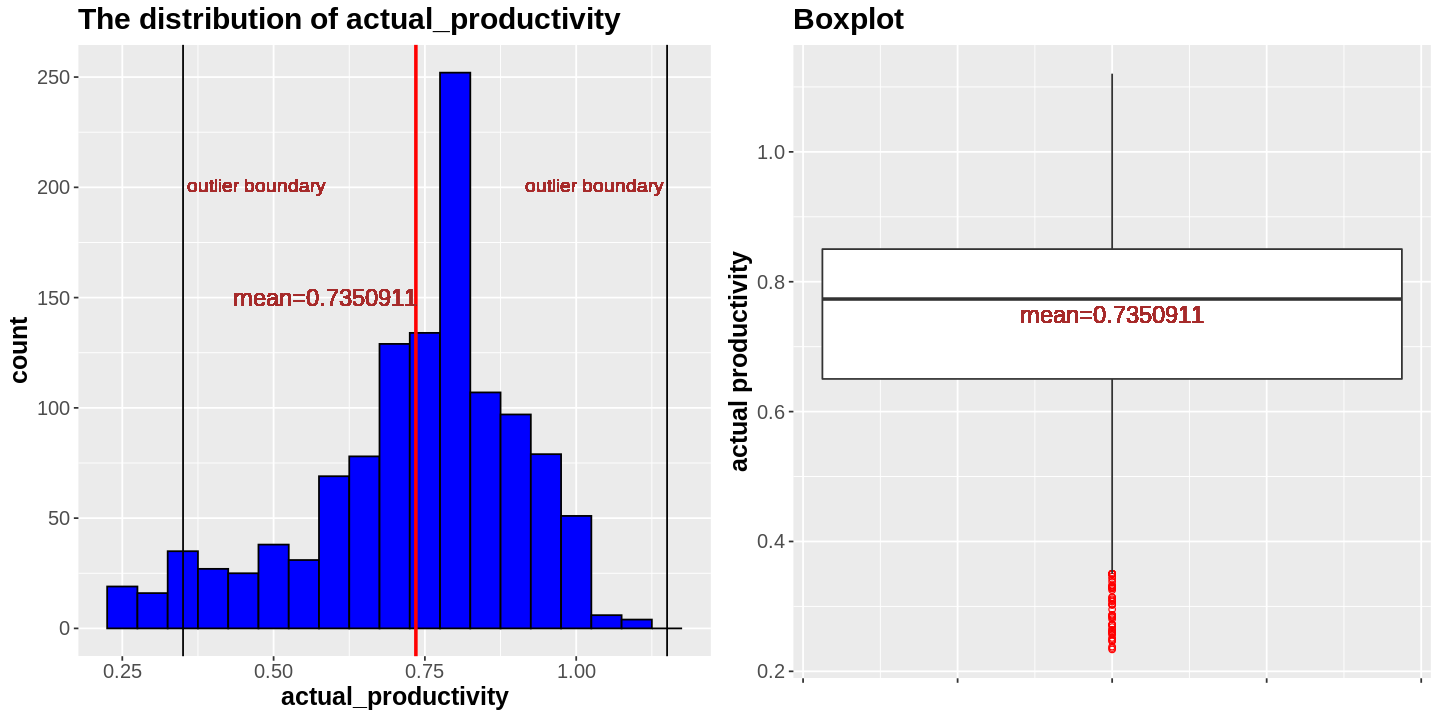

In [14]:

print("figure 9 (left): The distribution of actual_productivity")
print("figure 10 (right): The Boxplot of actual_productivity")
plot_grid(actual_productivity_histogram,actual_productivity_boxplot)

From the distribution plot, it seems that the distribution of the response variable `actual_productivity` follow a normal distribution, although it is slightly left-skewed. The skewness is also supported by the boxplot on the right, we see that all outliers are contributed on the bottom.

There are categorical variables and continuous variable in the data. The second step is taking a look at the relationships between **categorical variables** and response variable `actual_productivity`.

In [15]:
#boxplots (response variable against covariates)
quarter_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(x=quarter,y=actual_productivity,color=quarter), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot (actual_productivity against quarter)")+
            xlab("quater")+
            ylab("actual productivity")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold")
                   ) 

In [16]:
department_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(x=as.factor(department),y=actual_productivity,color=as.factor(department)), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot (actual_productivity against department)")+
            xlab("department")+
            ylab("actual productivity")+
            labs(color="department")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold")
                   ) 

In [17]:
day_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(x=day,y=actual_productivity,color=day), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot (actual_productivity against day)")+
            xlab("day")+
            ylab("actual productivity")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold"),
                  axis.text.x = element_text(angle=15,vjust=+0.5, hjust=+0.5)
                   ) 

In [18]:
team_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(x=as.factor(team),y=actual_productivity,color=as.factor(team)), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot (actual_productivity against team)")+
            xlab("team")+
            ylab("actual productivity")+
            labs(color="team")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold")
                   ) 

[1] "figure 11 : The Boxplot of categorical variables"


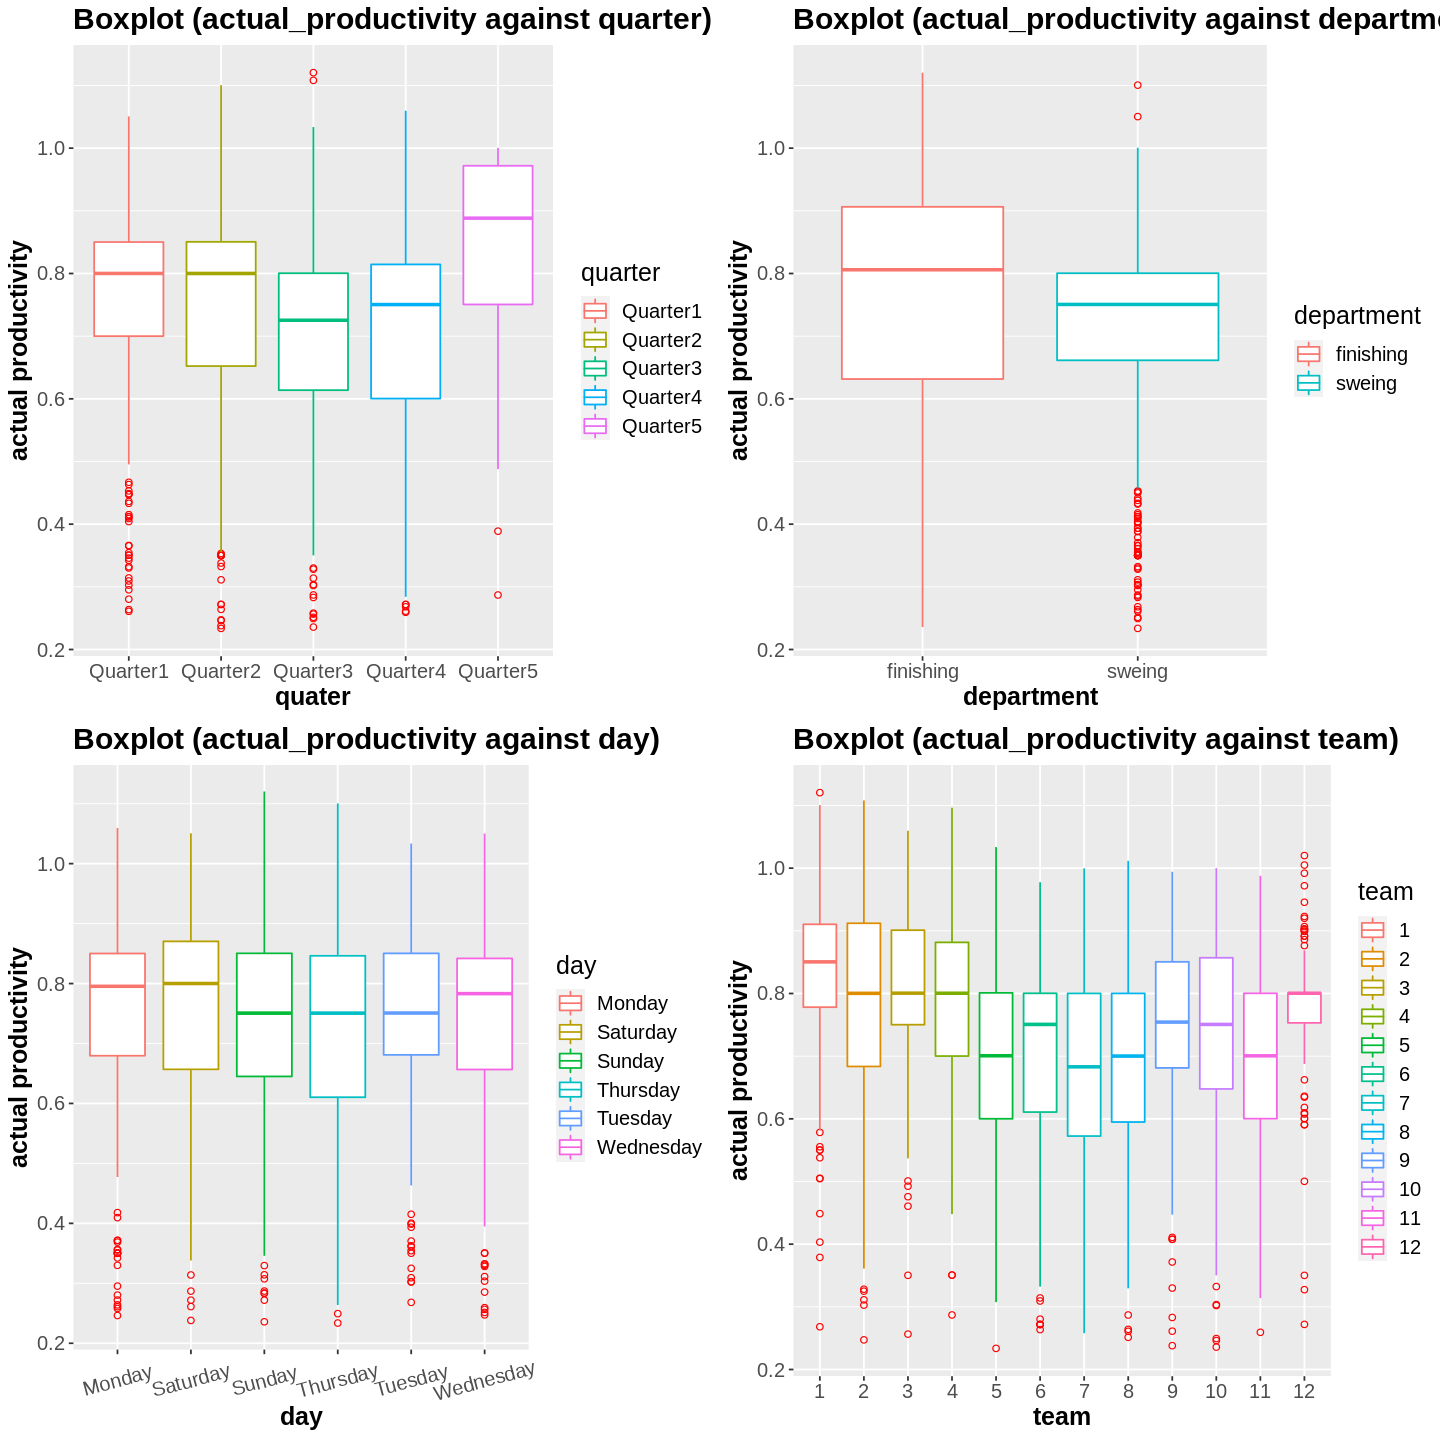

In [19]:
#plot
print("figure 11 : The Boxplot of categorical variables")
options(repr.plot.width = 12, repr.plot.height = 12)
plot_grid(quarter_boxplot,department_boxplot,day_boxplot,team_boxplot)

From the boxplots above, it seems that that the distributions of response variable `actual_productivity` varies among different quarters, department and teams, but we are not sure if the distributions are different for different days.

Then, we are exploring (visually) the association between **continuous variables** and the response variable `actual_productivity` in the dataset.

To make the information above more clear and visualized, we make a heat map. First, we require the prior data wrangling of `productivity_df`, and then we create a melted correlation matrix with all pairwise correlations between the input variables of `productivity_df` and name it `corr_matrix_productivity_df`.

In [20]:
#melted correlation matrix
print("figure 12 : melted correlation matrix")
corr_matrix_productivity_df <- productivity_df %>%
  select(-c(date,quarter,department,day,team)) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "correlation")

#overview of the matrix
head(corr_matrix_productivity_df)

[1] "figure 12 : melted correlation matrix"


var1,var2,correlation
<chr>,<chr>,<dbl>
targeted_productivity,targeted_productivity,1.00000000
targeted_productivity,smv,-0.06948887
targeted_productivity,wip,0.01903457
targeted_productivity,over_time,-0.08855669
targeted_productivity,incentive,0.03276790
targeted_productivity,idle_time,-0.05618090


The table above illustrates the correlation for all possible covariates between the response variable actual_productivity.

Then, we are using the matrix that we just created to plot a $10 \times 10$ (9 continous variables plus 1 response variable) heat map.

[1] "figure 13: heat map"


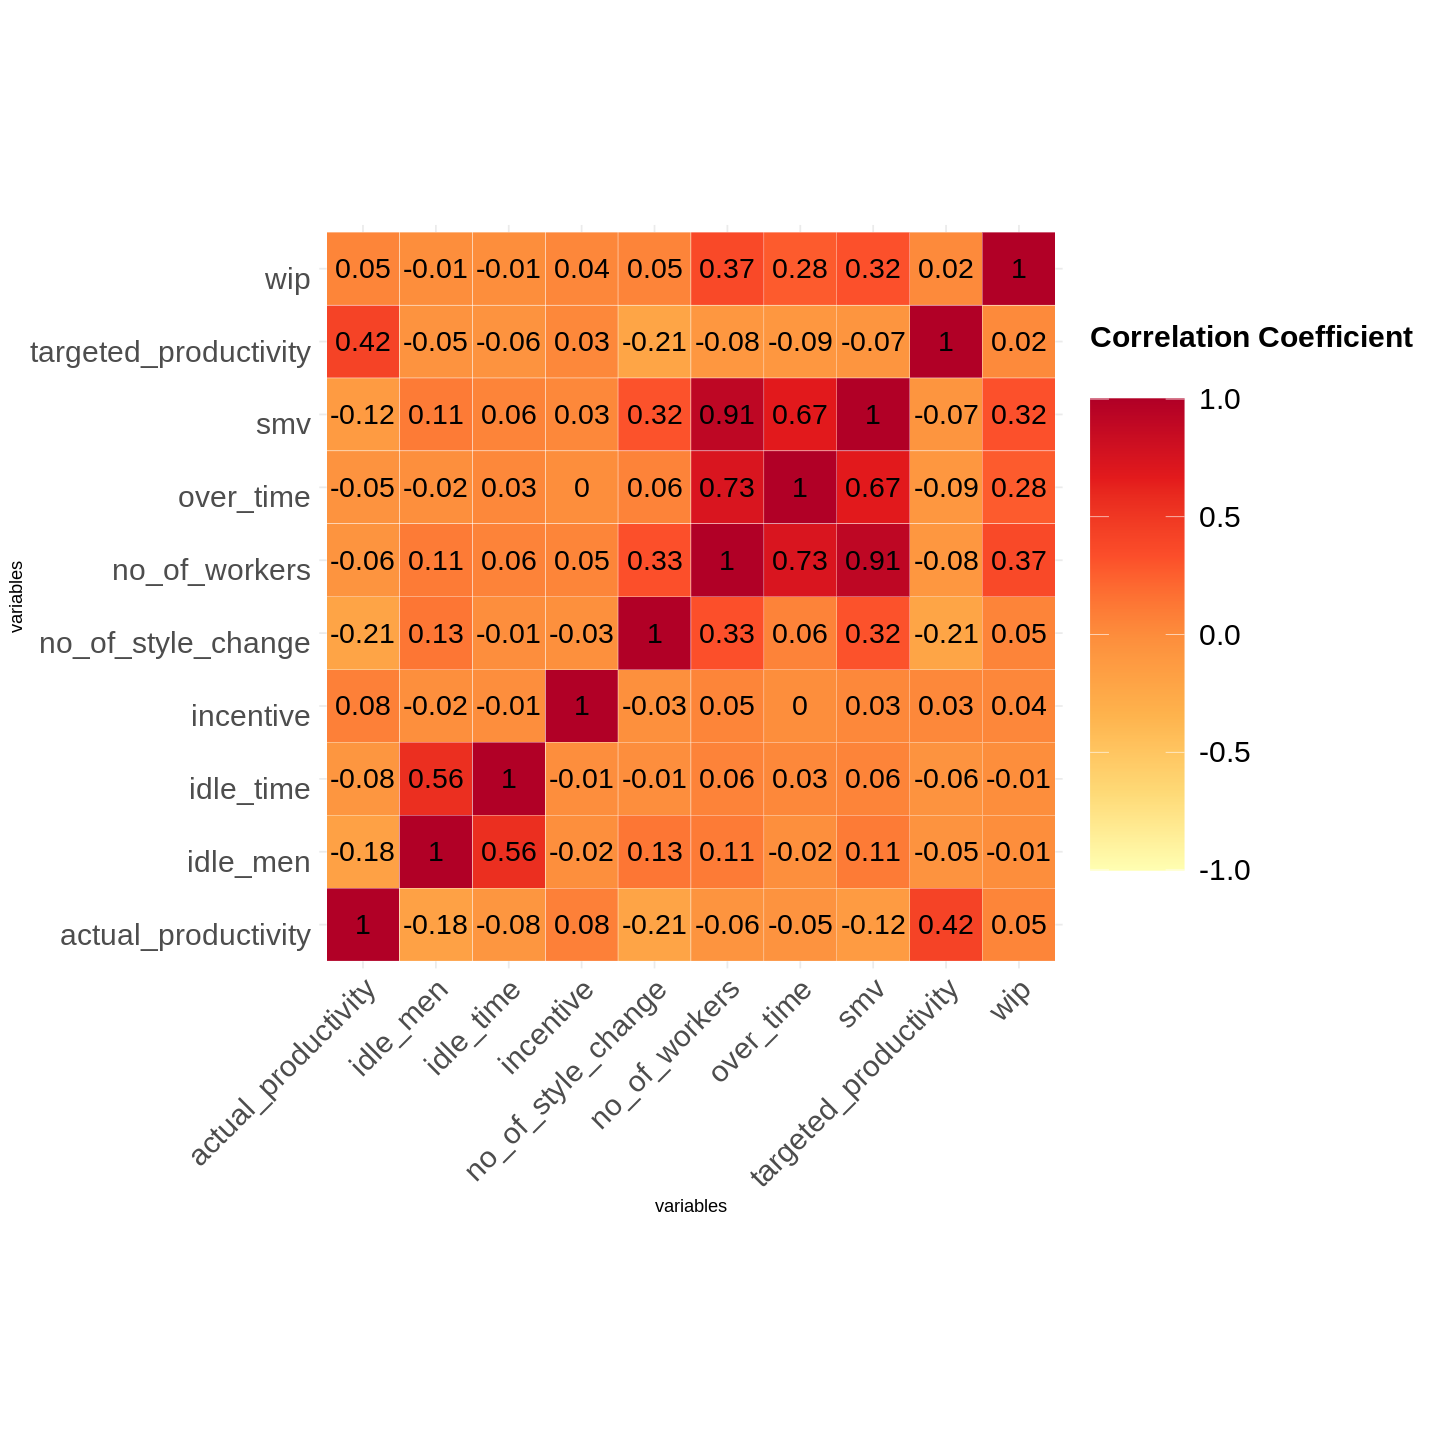

In [21]:
#heat map
print("figure 13: heat map")
plot_corr_matrix_productivity_df <- corr_matrix_productivity_df %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = correlation), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "variables", y = "variables") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(correlation,digits = 2)), color = "black", size = 6)

# plot
plot_corr_matrix_productivity_df

From the plot above, we can easily find the high correlation coefficients from the heatmap, where the correlation coefficient gives the colour scale.

Now, we build our first full model using all covariates. Note that the variable `date`, `day`, and `quarter` are considered useless, since there should almost be no correlation between the productivity and these three variables. Also, containing these three variables will pose a burden on building the model because there are many levels. Thus, we remove the `date`, `day` and `quarter` by default. In addition, variable `department` is also omitted in the modeling, since one of its level "finishing" indicates the `wip` is 0, and there are 506/1197 observations are "finishing" and with `wip`=0. In another words, `department` and `wip` are highly correlated. A nother reason for omitting `department` is that this will cause some conflict in making matrix when we do Ridge or LASSO regression.

In [22]:
#remove date
productivity<-productivity_df%>%select(-c("date","day","quarter","department"))

#Overview
print("figure 14: The overview of data used for model") 
head(productivity,3)

[1] "figure 14: The overview of data used for model"


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1,0.75,3.94,0,960,0,0,0,0,8,0.8865000
2,2,0.75,3.94,0,960,0,0,0,0,8,0.7551667
3,10,0.65,3.94,0,960,0,0,0,0,8,0.7059167


>### Model 1: Full model

In [23]:
#full model
model_full<-lm(actual_productivity~.,data=productivity)

#summary
print("figure 15: The summary of full model") 
summary(model_full)

[1] "figure 15: The summary of full model"



Call:
lm(formula = actual_productivity ~ ., data = productivity)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57826 -0.06254  0.01712  0.08576  0.52745 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.842e-01  3.546e-02   8.017 2.58e-15 ***
team                  -9.024e-03  1.254e-03  -7.196 1.10e-12 ***
targeted_productivity  7.044e-01  4.529e-02  15.553  < 2e-16 ***
smv                   -7.105e-03  9.666e-04  -7.351 3.66e-13 ***
wip                    3.832e-06  3.079e-06   1.245   0.2135    
over_time             -4.547e-06  2.007e-06  -2.266   0.0236 *  
incentive              4.996e-05  2.700e-05   1.850   0.0645 .  
idle_time              4.525e-04  4.113e-04   1.100   0.2715    
idle_men              -8.666e-03  1.625e-03  -5.333 1.15e-07 ***
no_of_style_change    -4.631e-02  1.148e-02  -4.035 5.82e-05 ***
no_of_workers          3.697e-03  5.405e-04   6.840 1.26e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘

Then, let us check the vif of the full model.

In [24]:
#vif of full model
print("figure 16: The variance inflation factor for full model") 
vif(model_full)

[1] "figure 16: The variance inflation factor for full model"


team targeted_productivity                   smv 
             1.021770              1.064375              6.057859 
                  wip             over_time             incentive 
             1.177220              2.444858              1.012734 
            idle_time              idle_men    no_of_style_change 
             1.479906              1.527878              1.306037 
        no_of_workers 
             7.795425

From the output above, we can see that the adjusted R-squared is only 0.2745. Also, many covariates in the model have a p-value greater than 0.05, which indicates that the covariates may not be significant in the model. They should be ommited. However, omitting all insignificant covariates directly may not lead to the model we want. This is because the combinations of covariates influence the results. Considering this situation, we try to use forward selection and backward seletion to build reduced models. In addition, some vif values are greater than 5, we may say there is multicollinearity in the model. In this case, we should do more investigation and find better models.

>### Model 2: Reduced model by forward selection

Then, to make the model simpler, we are using forward selection and backward selection to select the covariate.

In [25]:
#forward selection
productivity_forward<- regsubsets(
  x=actual_productivity~., 
  nvmax=10,
  data=productivity,
  method="forward"
)

forward_summary<-summary(productivity_forward)

forward_summary_df <- data.frame(
   n_input_variables = 1:10,
   RSQ = forward_summary$rsq,
   RSS = forward_summary$rss,
   ADJ.R2 = forward_summary$adjr2
                                      )

In [26]:
#results
print("figure 17: The forward selection") 
forward_summary

#highest adjR^2
print(c("The number of input variables should be:",which.max(forward_summary_df$ADJ.R2)))

print(c("The highest adj R^2 is:",max(forward_summary_df$ADJ.R2)))

[1] "figure 17: The forward selection"


Subset selection object
Call: regsubsets.formula(x = actual_productivity ~ ., nvmax = 10, data = productivity, 
    method = "forward")
10 Variables  (and intercept)
                      Forced in Forced out
team                      FALSE      FALSE
targeted_productivity     FALSE      FALSE
smv                       FALSE      FALSE
wip                       FALSE      FALSE
over_time                 FALSE      FALSE
incentive                 FALSE      FALSE
idle_time                 FALSE      FALSE
idle_men                  FALSE      FALSE
no_of_style_change        FALSE      FALSE
no_of_workers             FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          team targeted_productivity smv wip over_time incentive idle_time
1  ( 1 )  " "  "*"                   " " " " " "       " "       " "      
2  ( 1 )  "*"  "*"                   " " " " " "       " "       " "      
3  ( 1 )  "*"  "*"                   " " " " " "       " "       " "      


[1] "The number of input variables should be:"
[2] "10"                                      
[1] "The highest adj R^2 is:" "0.27452199644679"       


Since we are investigating the inference. We are looking at the adjusted $R^2$. In this case, the greater the adjusted $R^2$ the greater the goodness of fit. From the results above, we see that the model with 11 variables has the highest adjusted $R^2$, which is "0.27452199644679".

Because the forward selection tells us the adjusted $R^2$ is highest when we use all variables, which is the same as the full model, we are not fitting the model again here.

>### Model 3: Reduced model by backward selection

Same as above, but this time we are using backward selection. We expect that the model from backward selection is different from above.

In [27]:
productivity_backward<- regsubsets(
  x=actual_productivity~., 
  nvmax=10,
  data=productivity,
  method="backward"
)

backward_summary<-summary(productivity_backward)

backward_summary_df <- data.frame(
   n_input_variables = 1:10,
   RSQ = forward_summary$rsq,
   RSS = forward_summary$rss,
   ADJ.R2 = forward_summary$adjr2
                                  )

In [28]:
#results
print("figure 18: The backward selection") 
backward_summary_df

#highest adjR^2
print(c("The number of input variables should be:",which.max(backward_summary_df$ADJ.R2)))

print(c("The highest adj R^2 is:",max(backward_summary_df$ADJ.R2)))

[1] "figure 18: The backward selection"


n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.1777414,29.94127,0.1770533
2,0.2038530,28.99046,0.2025194
3,0.2277877,28.11891,0.2258459
4,0.2386111,27.72480,0.2360561
5,0.2431127,27.56088,0.2399352
6,0.2733343,26.46040,0.2696705
7,0.2768099,26.33385,0.2725523
8,0.2789234,26.25689,0.2740676
9,0.2798538,26.22301,0.2743936


[1] "The number of input variables should be:"
[2] "10"                                      
[1] "The highest adj R^2 is:" "0.27452199644679"       


Backward selection also tells us the adjusted $R^2$ is highest (0.27452199644679) when we use all variables.

>### Model 4: Reduced model by LASSO regression

First, we split the data into two. One is used for selection and the other one is used for conduct inferece. This is because LASSO has biased estimators, and we cannot use the same data to select variables of the model and to conduct inferece.

In [29]:
set.seed(555)

#add ID (row number) for splitting
productivity$ID <- rownames(productivity)

#split into two (30% for selection, 70% for inference)
productivity_inference <- 
    productivity %>% 
    slice_sample(prop = 0.7)

productivity_selection <- 
    productivity %>% 
    anti_join(productivity_inference,by = "ID")

#remove ID column
productivity_selection <-
    productivity_selection %>% 
    select(-ID)

productivity_inference <-
    productivity_inference %>% 
    select(-ID)

Then, we use selection data to do LASSO.

In [30]:
set.seed(59)

#LASSO model
lasso_model <-
    cv.glmnet(x=productivity_selection %>%select(-"actual_productivity")%>% as.matrix(), 
              y=productivity_selection %>%select("actual_productivity")%>% as.matrix(), 
              alpha = 1)

Let us see how Mean-squared error changes with lambda

[1] "figure 19: LASSO lambda selection by CV"
[1] "lambda.1se:"        "0.0128078030412305"
[1] "lambda.min:"          "0.000652447165395121"


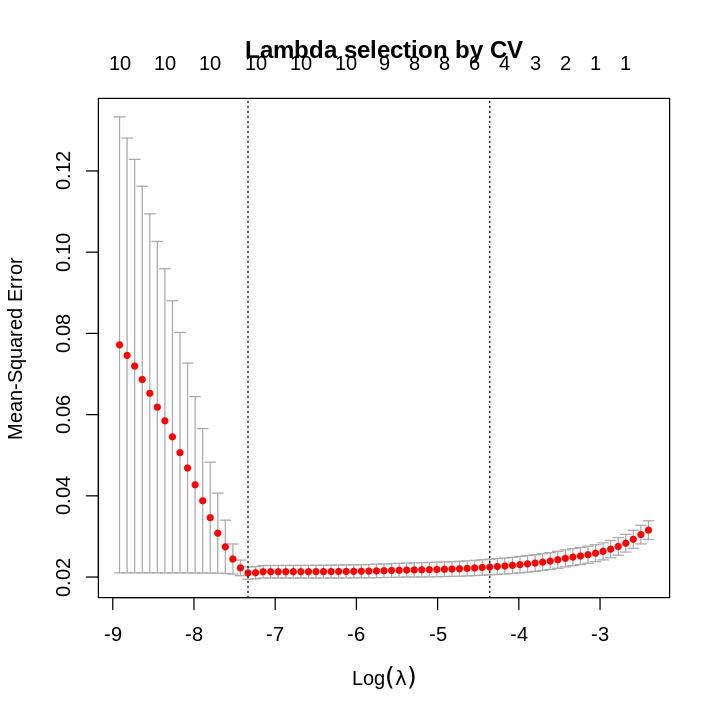

In [31]:
#plot
print("figure 19: LASSO lambda selection by CV") 
options(repr.plot.width = 6, repr.plot.height = 6)
plot(lasso_model, main = "Lambda selection by CV")

#lambda index
print(c("lambda.1se:",lasso_model$lambda.1se))
print(c("lambda.min:",lasso_model$lambda.min))

From the plot above, we see that using lambda.1se (largest lambda that will not significantly cause a significant reduction in MSE) will lead to a model with 6 covariates, which is a simpler model. We are more interested in this model.

In [32]:
#lasso model
print("figure 20: LASSO model") 
beta_lasso<-coef(lasso_model, s = lasso_model$lambda.1se)
beta_lasso

[1] "figure 20: LASSO model"


11 x 1 sparse Matrix of class "dgCMatrix"
                                 s1
(Intercept)            1.430794e-01
team                  -6.200570e-03
targeted_productivity  8.582306e-01
smv                    .           
wip                    .           
over_time              .           
incentive              8.586641e-07
idle_time              .           
idle_men              -3.627796e-03
no_of_style_change    -1.769832e-02
no_of_workers          4.345477e-05

From the results above, we see that only `team`, `targeted_productivity`, `incentive`, `idle_men`, `no_of_style_change` and `no_of_workers` are selected, while the rest of variables are shrinkaged to 0. Then, we selected these six variables to fit our Ordinary least square model.

In [33]:
#reduced model
reduced_model<-lm(actual_productivity~team+targeted_productivity+incentive+idle_men+no_of_style_change+no_of_workers,data=productivity_inference)

Then, we check the multicollinearity of our reduced model using `vif()` function.

In [34]:
round(vif(reduced_model),4)

team targeted_productivity             incentive 
               1.0126                1.0507                1.0138 
             idle_men    no_of_style_change         no_of_workers 
               1.0360                1.2062                1.1593

We see that all vif values above are below 5, we consider that there is no multicollinearity in this model.

Last, let us see the model information.

In [35]:
print("figure 21: LASSO reduced model") 
summary(reduced_model)
tidy(reduced_model)

[1] "figure 21: LASSO reduced model"



Call:
lm(formula = actual_productivity ~ team + targeted_productivity + 
    incentive + idle_men + no_of_style_change + no_of_workers, 
    data = productivity_inference)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57817 -0.05715  0.01528  0.08121  0.48950 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.471e-01  4.170e-02   8.322 3.54e-16 ***
team                  -6.936e-03  1.554e-03  -4.462 9.22e-06 ***
targeted_productivity  6.178e-01  5.355e-02  11.538  < 2e-16 ***
incentive              7.333e-05  4.226e-05   1.735  0.08308 .  
idle_men              -8.064e-03  1.825e-03  -4.418 1.13e-05 ***
no_of_style_change    -3.989e-02  1.326e-02  -3.007  0.00271 ** 
no_of_workers         -2.447e-04  2.588e-04  -0.946  0.34464    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.154 on 830 degrees of freedom
Multiple R-squared:  0.2138,	Adjusted R-squared:  0.2081 
F-sta

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.470581e-01,4.170481e-02,8.3217758,3.544710e-16
team,-6.935615e-03,1.554242e-03,-4.4623790,9.223337e-06
targeted_productivity,6.178185e-01,5.354673e-02,11.5379310,1.143164e-28
incentive,7.332532e-05,4.225736e-05,1.7352085,8.307506e-02
idle_men,-8.063825e-03,1.825256e-03,-4.4179144,1.128579e-05
no_of_style_change,-3.988615e-02,1.326232e-02,-3.0074790,2.713736e-03
no_of_workers,-2.447428e-04,2.588278e-04,-0.9455813,3.446374e-01


We can see that the the adj-$R^2$ is 0.2081, there is only a small reduction compared to that of full model above. Considering this model only uses 6 variables instead of 10, we decide to use this reduced model instead of using the full model.

## Discussion

We chose the reduced model by lasso regression to select variables to identify factors that are related to the actual productivity of the garment industry. The explanatory variables thus selected are team, targeted productivity, incentive, the number of workers who were idle(idle_men), number of style changes in product, and the number of workers in total. We made some important observations through this project. Our findings clearly show that the target productivity set for the workers in garment industry is one of the most important factors that aid in achieving high actual productivity. We found that the productivity also depended on the team in which the workers were divided, this could be because of the skillset each member of the team possesses which could vary for every team. This is an important observation as it could help factories to effectively form better teams. We see that incentive is also a driving factor for the actual productivity as it motivates workers to work harder and churn out more products. Although we see that our adj-$R^2$ is on the lower end, we believe that this could stem from the fact that our response variable in reality depends on several variables with multiple factors whereas our dataset only consists of a few key ones.

There exist a few limitations with our inference. For one, we note that our response variable, productivity, ranges from 0 to 1, whereas the linear regression ranges from negative infinity to positive infinity. The consequence of this is that if we use our model under a linear regression model to predict, it is possible that we return a value that is outside of the range from 0 to 1. From the context of our dataset, we see that a value outside this range would be rather unreasonable, as we cannot say that someone has negative productivity. In terms of insights we get from this analysis, although we have analyzed how different models may aid in eliminating multicollinearity, we need to understand that our results are not widely applicable as they are limited to our dataset. Moreover, since the productivity of a worker is a subjective quality, there can be many more factors, for instance, the working conditions in factories, with multiple levels that could influence the productivity in real life.

Research pertaining to the use of modernized machines in garment industry and their impact on productivity could lead to interesting and critical results. Further research in this area with more elaborate data and intricate details of variables would be a game changer for garment industries. This large amount of data could provide them with actionable insights using which they would be able to tweak the numerous factors that affect the productivity of workers by desired amounts and increase their growth.

----------

## References

Data: https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees

[1] Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT). https://doi.org/10.1109/CoDIT.2019.8820486

[2] Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of the Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. https://doi.org/10.1504/ijbidm.2021.118183